Limpieza de datos 

Cada variable forma una columna.
Cada observación forma una fila.
Cada tipo de unidad observacional forma una tabla.

Valores nulos.
Datos inconsistentes
Valores atípicos (Outliers)

1- Importamos librerias

In [1]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# para pintar
import pylab as plt    # import matplotlib.pyplot as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
cd data

/Users/esteban/Phyton/w2_project_pandas/data


In [4]:
# Cargamos los datos

tiburon= pd.read_csv('/Users/esteban/Phyton/w2_project_pandas/data/attacks.csv', encoding= 'latin-1')

tiburon=tiburon.copy()

tiburon

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Definimos el siguiente objetivo:

Identificar los patrones y tendencias en los ataques de tiburones a lo largo del tiempo y en diferentes países.

- ¿Ha habido un aumento o disminución en los ataques de tiburones a lo largo de los años?
- ¿Existen ciertos meses o estaciones del año en los que se producen más ataques de tiburones?
- ¿Cuáles son los países con mayor incidencia de ataques de tiburones?
- ¿Cuál es el tipo de ataque más común (provocado o no provocado)?
- ¿Existe alguna relación entre las actividades humanas y los ataques de tiburones? ¿Cuáles son las actividades más riesgosas?

In [5]:
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
# Empezamos con todas las columnas con valores perdidos. (25723 rows × 24 columns )

valoresperdidos = tiburon.isnull()
valoresperdidos

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
valoresperdidos.sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
# Observo que hay muchas filas en las cuales todos son valores nulos, por lo cual no me es util.

tiburon.dropna(thresh=1, inplace = True)

In [9]:
tiburon
# observo que en la columna Case Number hay valores 0 y en el resto de filas hay valores nulos que no me valen

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Vamos a la columna Case Number y observamos 

exploramos = ['Case Number', 'Date',]
datacheck = tiburon [exploramos][tiburon['Case Number'].isnull()]
datacheck


,Case Number,Date
5488,NaN,Reported 06-Sep-1905


In [11]:
tiburon['Case Number'].isnull().sum() 
# Observamos que solo tengo un valor nulo, que corresponde a 5488

1

In [49]:
pd.set_option('display.max_rows', None)
filtrado = tiburon[tiburon['Case Number'] == '0']

filtrado.head()
# No me muestraba ningun caso, porque la columba es un objeto y no un int, por lo cual la buscamos en string

# Observamos que tenemos datos en "original orden" que no tienen mucho sentido.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [13]:
exploramos = ['Case Number', 'original order',]
datacheck = tiburon [exploramos][tiburon['Case Number'].isnull()]
datacheck

,Case Number,original order
5488,NaN,815.0


In [14]:
exploramos = ['Case Number', 'original order',]
datacheck = tiburon [exploramos][tiburon['Case Number'].isnull()]
datacheck

,Case Number,original order
5488,NaN,815.0


In [15]:
tiburon['original order'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [16]:
filtrado2 = tiburon[tiburon['original order'] == 0]
filtrado2

# en original order no tenemos 0, por lo cual sustituiremos los valores nulos por 0

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [50]:
tiburon['original order'] = np.nan
tiburon.head()

# Tomo la decision de poner toda la columna en valor nulo

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-06-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,NaN,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN,NaN
1,2018.06.18,18-06-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN,NaN
2,2018.06.09,09-06-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN,NaN
3,2018.06.08,08-06-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN,NaN
4,2018.06.04,04-06-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN,NaN


In [18]:
tiburon['Case Number'] = tiburon['Case Number'].replace('0', np.nan)

# Veo que todo lo que vale 0 en "Case _Number" no me vale nada.

In [19]:
tiburon.dropna(thresh=1, inplace = True)

# elimino todas las filas con valores nulos

In [20]:
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [21]:
tiburon.tail(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,NaN,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,NaN,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,NaN,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
filtrado3 = tiburon[tiburon['Case Number'] == 'xx']

filtrado3

# No me vale de nada esta fila.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
tiburon['Case Number'] = tiburon['Case Number'].replace('xx', np.nan)
# reemplazo la fila por nan

tiburon.dropna(thresh=1, inplace = True)

# Elimino todas las filas con valores nan

In [24]:
tiburon.head(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,NaN,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,NaN,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,NaN,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,NaN,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,NaN,NaN,NaN


In [25]:
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [26]:
valoresperdidos2= tiburon.isna().sum()
valoresperdidos2

#Al analizar veo que la siguiente columna con mas valores nulos es time, para mi objetivo me es indiferente la hora del ataque

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order            6302
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [27]:
tiburon['Time'] = np.nan
tiburon.head()

# Tomo la decision de volverlos todos nulos, trabajaré con valores nulos. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,NaN,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN,NaN


In [28]:
tiburon['Unnamed: 23'] = np.nan

# Esta columna no me aporta nada, la convertimos toda en valor nulo

In [29]:
tiburon['Unnamed: 22'] = np.nan

# Esta columna no me aporta nada, la convertimos toda en valor nulo

In [30]:
tiburon.info() # objetivo de trabajar solo con validos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    0 non-null      float64
 14  Species                 3464 non-null   

In [31]:
tiburon['Case Number']

0               2018.06.25
1               2018.06.18
2               2018.06.09
3               2018.06.08
4               2018.06.04
5             2018.06.03.b
6             2018.06.03.a
7               2018.05.27
8             2018.05.26.b
9             2018.05.26.a
10              2018.05.24
11              2018.05.21
12            2018.05.13.b
13            2018.05.13.a
14              2018.05.00
15              2018.05.12
16              2018.05.09
17            2018.04.30.R
18            2018.04.28.b
19            2018.04.28.a
20            2018.04.25.b
21            2018.04.25.a
22              2018.04.24
23              2018.04.23
24              2018.04.22
25              2018.04.19
26            2018.04.15.d
27            2018.04.15.c
28            2018.04.15.b
29            2018.04.15.a
30              2018.04.14
31            2018.04.10.R
32              2018.04.09
33              2018.04.05
34              2018.04.03
35              2018.03.31
36              2018.03.14
3

In [32]:
tiburon['Date']

0                                             25-Jun-2018
1                                             18-Jun-2018
2                                             09-Jun-2018
3                                             08-Jun-2018
4                                             04-Jun-2018
5                                             03-Jun-2018
6                                             03-Jun-2018
7                                             27-May-2018
8                                             26-May-2018
9                                             26-May-2018
10                                            24-May-2018
11                                            21-May-2018
12                                            13-May-2018
13                                            13-May-2018
14                                               May 2018
15                                            12-May-2018
16                                            09-May-2018
17            

In [33]:
tiburon['Case Number.1']

0               2018.06.25
1               2018.06.18
2               2018.06.09
3               2018.06.08
4               2018.06.04
5             2018.06.03.b
6             2018.06.03.a
7               2018.05.27
8             2018.05.26.b
9             2018.05.26.a
10              2018.05.24
11              2018.05.21
12            2018.05.13.b
13            2018.05.13.a
14              2018.05.00
15              2018.05.12
16              2018.05.09
17            2018.04.30.R
18            2018.04.28.b
19            2018.04.28.a
20            2018.04.25.b
21            2018.04.25.a
22              2018.04.24
23              2018.04.23
24              2018.04.22
25              2018.04.19
26            2018.04.15.d
27            2018.04.15.c
28            2018.04.15.b
29            2018.04.15.a
30              2018.04.14
31            2018.04.10.R
32              2018.04.09
33              2018.04.05
34              2018.04.02
35              2018.03.31
36              2018.03.14
3

In [34]:
tiburon['Case Number.2']

0               2018.06.25
1               2018.06.18
2               2018.06.09
3               2018.06.08
4               2018.06.04
5             2018.06.03.b
6             2018.06.03.a
7               2018.05.27
8             2018.05.26.b
9             2018.05.26.a
10              2018.05.24
11              2018.05.21
12            2018.05.13.b
13            2018.05.13.a
14              2018.05.00
15              2018.05.12
16              2018.05.09
17            2018.04.30.R
18            2018.04.28.b
19            2018.04.28.a
20            2018.04.25.b
21            2018.04.25.a
22              2018.04.24
23              2018.04.23
24              2018.04.22
25              2018.04.19
26            2018.04.15.d
27            2018.04.15.c
28            2018.04.15.b
29            2018.04.15.a
30              2018.04.14
31            2018.04.10.R
32              2018.04.09
33              2018.04.05
34              2018.04.03
35              2018.03.31
36              2018.03.14
3

In [35]:
def filter_date(x):
    value = str(x)
    pattern = r"\d{4}\.\d{2}\.\d{2}"
    match = re.search(pattern, value)
    if match:
        clean_date = match.group()
        return clean_date
    else:
        return np.nan
import re

# Creamos una funcion donde solo me devuelva los valores valido

In [36]:
tiburon['Case Number.1'] = tiburon['Case Number.1'].apply(filter_date)


In [37]:
tiburon['Case Number.1'].isna().sum()

128

In [38]:
tiburon['Case Number'] = tiburon['Case Number'].apply(filter_date)

In [39]:
tiburon['Case Number'].isna().sum()

130

In [40]:
tiburon['Case Number.2']= tiburon['Case Number.2'].apply(filter_date)

In [41]:
tiburon['Case Number.2'].isna().sum()

127

In [42]:
def filter_date2(value):
    value = str(value)
    
    # Expresión regular para buscar una fecha en formato DD-MMM-YYYY
    pattern = r'(\d{2})-(\w{3})-(\d{4})'
    match = re.search(pattern, value)
    
    if match:  # Si se encuentra una fecha en formato DD-MMM-YYYY
        day = match.group(1)
        month = match.group(2)
        year = match.group(3)

        # Mapeo de los meses en formato MMM a números
        month_mapping = {
            'Jan': '01',
            'Feb': '02',
            'Mar': '03',
            'Apr': '04',
            'May': '05',
            'Jun': '06',
            'Jul': '07',
            'Aug': '08',
            'Sep': '09',
            'Oct': '10',
            'Nov': '11',
            'Dec': '12'
        }

        if month in month_mapping:
            month = month_mapping[month]
        else:
            month = '00'
        
        return f"{day}-{month}-{year}"
    
    else:  # Si no se encuentra una fecha en formato DD-MMM-YYYY, manejar otros casos
        # Expresión regular para buscar un año en formato YYYY
        pattern = r'(\d{4})'
        match = re.search(pattern, value)
        
        if match:  # Si se encuentra un año en formato YYYY
            year = match.group(1)
            return f"00-00-{year}"
    
    return np.nan  # Si no se encuentra ninguna fecha válida, retornar NaN

In [43]:
prueba1 = tiburon['Date'].apply(filter_date2)

In [44]:
tiburon['Date']= tiburon['Date'].apply(filter_date2)

In [45]:
tiburon['Date'].isna().sum()

19

In [46]:
tiburon.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6297,NaN,00-00-1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6298,NaN,00-00-1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6299,NaN,00-00-1900,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6300,NaN,00-00-1883,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6301,NaN,00-00-1845,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN


In [47]:
exploramos2 = ['Case Number', 'Date', 'Year', 'Case Number.1', 'Case Number.2']
datacheck4 = tiburon[exploramos2][tiburon['Case Number'].isnull()]
datacheck4

# Utilizare la columna Date para trabajar.

,Case Number,Date,Year,Case Number.1,Case Number.2
390,NaN,10-07-2015,2015.0,2015.07.10,2015.07.10
3795,NaN,30-08-1962,1962.0,1962.08.30,NaN
5488,NaN,06-09-1905,1905.0,1905.09.06,1905.09.06
5944,NaN,00-00-1864,1864.0,1864.05.00,1864.05.00
6009,NaN,29-04-1853,1853.0,1853.04.29,NaN
6177,NaN,NaN,0.0,NaN,NaN
6178,NaN,NaN,0.0,NaN,NaN
6179,NaN,NaN,0.0,NaN,NaN
6180,NaN,NaN,0.0,NaN,NaN
6181,NaN,00-00-1939,0.0,NaN,NaN


In [52]:
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6172 non-null   object 
 1   Date                    6283 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    0 non-null      float64
 14  Species                 3464 non-null   

In [53]:
tiburon.tail(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6202,NaN,00-00-1963,0.0,Unprovoked,DJIBOUTI,Gulf of Tadjoura,NaN,A dhow capsized,Passenger & crew,NaN,NaN,FATAL,Y,NaN,NaN,A. C. Doyle,ND-0119-Gulf-of-Tadjoura.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6203,NaN,00-00-1896,0.0,Unprovoked,LIBYA,Cyrenaica,Kirinaiki,Sponge diving,a diver from Kalymnos,M,NaN,FATAL,Y,NaN,NaN,M. Bardanis,ND-0118-Stathis-partner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6204,NaN,00-00-1936,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Net-fishing,August Eichmann,M,NaN,Calf bitten,N,NaN,NaN,"Courier-Mail, 1/11/1936",ND-0116-Eichmann.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6205,NaN,08-06-1912,0.0,Unprovoked,NEW ZEALAND,North Island,"Point Halsey, Wellington",NaN,Kai-tawaro,M,NaN,FATAL,Y,NaN,NaN,"Evening Post, 6/8/1912",ND-0115-Wellington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6206,NaN,00-00-2012,0.0,Unprovoked,NaN,NaN,In a river feeding into the Bay of Bengal,Netting shrimp,Sametra Mestri,F,NaN,Hand severed,N,NaN,NaN,National Georgraphic Television,ND-0114-BayOfBengal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6207,NaN,00-00-1911,0.0,Unprovoked,VIETNAM,NaN,NaN,Bathing,male,M,NaN,Foot bitten,N,NaN,NaN,"Daily Kennebec Journal, 3/27/ 1911",ND-0113-Vietnam.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6208,NaN,00-00-1901,0.0,Unprovoked,SRI LANKA,Northern Province,Mannar,Fishing?,male,M,NaN,Foot bitten,N,NaN,NaN,Gould & Pyle,ND-0111-SriLanka.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6209,NaN,00-00-1960,0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,4 French divers,M,NaN,"FATAL (x3), one survived with minor injuries",Y,NaN,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,ND-0110-FrenchDivers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6210,NaN,00-00-2006,0.0,Unprovoked,USA,Florida,"Tampa Bay, Hillsborough County",Wade-fishing,Ed Snyder,M,NaN,"No injury, shark rammed his back",N,NaN,NaN,Fishingworld.com,ND-0109-Ed-Snyder.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6211,NaN,00-00-2003,0.0,Unprovoked,GREECE,Dodecanese Islands,Near Symi Island,Free diving for sponges,male,M,NaN,FATAL,Y,NaN,NaN,M. Kalafatas,ND-0108-SpongeDiver-Symi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN


In [55]:
filas_nulas= tiburon[tiburon['Date'].isnull()]
filas_nulas

# No veo nada relevante 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4644,1944.07.22,NaN,1944.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Hartenbos,Swimming,Albert Schmidt,M,17,"FATAL, body not recovered",Y,NaN,"White shark, according to witnesses","M. Levine, GSAF",1944.07.22-Schmidt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.07.22,1944.07.22,NaN,NaN,NaN
4802,1939.00.00,NaN,1939.0,Sea Disaster,SRI LANKA,NaN,NaN,She was on a ship that was torpedoes & was in ...,A W.R.E.N.,F,NaN,Leg severely bitten,N,NaN,NaN,"V.M. Coppleson (1962), p.258",1939.00.00.e-WREN.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1939.00.00,1939.00.00,NaN,NaN,NaN
4838,1937.09.26,NaN,1937.0,Provoked,CROATIA,Split-Dalmatia County,Bisk,Fishing,2 males,M,NaN,Injured by shark they were trying to catch PRO...,N,NaN,NaN,"C. Moore, GSAF",1937.09.16.R-Omis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1937.09.26,1937.09.26,NaN,NaN,NaN
6174,0500.00.00,NaN,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,NaN,NaN,NaN
6175,0077.00.00,NaN,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,NaN,NaN,NaN
6176,0005.00.00,NaN,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,NaN,NaN,NaN
6177,NaN,NaN,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6178,NaN,NaN,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6179,NaN,NaN,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6180,NaN,NaN,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN


In [69]:
tiburon = tiburon.dropna(subset=['Date'])
tiburon.tail()
## Tomo la decision de borrar todas las filas nulas de Date, no me muestra nada realevante para mi investigacion

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6297,NaN,00-00-1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6298,NaN,00-00-1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6299,NaN,00-00-1900,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6300,NaN,00-00-1883,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6301,NaN,00-00-1845,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN


In [70]:
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6283 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6166 non-null   object 
 1   Date                    6283 non-null   object 
 2   Year                    6281 non-null   float64
 3   Type                    6279 non-null   object 
 4   Country                 6235 non-null   object 
 5   Area                    5831 non-null   object 
 6   Location                5749 non-null   object 
 7   Activity                5741 non-null   object 
 8   Name                    6074 non-null   object 
 9   Sex                     5718 non-null   object 
 10  Age                     3470 non-null   object 
 11  Injury                  6255 non-null   object 
 12  Fatal (Y/N)             5744 non-null   object 
 13  Time                    0 non-null      float64
 14  Species                 3463 non-null   

In [ ]:
# Necesito igual mis datos de no nulos, de las siguientes columnas:

#Date                    6283
#Country                 6252
#Type                    6298
#Activity                5758

In [71]:
# Exploremos los valores nulos de cada
tiburon['Country'].isna().sum()

48

In [72]:
tiburon['Type'].isna().sum()

4

In [73]:
tiburon['Activity'].isna().sum()

542

In [90]:
#Tomare la decision de eliminar todos los valores nulos de lesión y observamos:
tiburon= tiburon.dropna(subset=['Injury'])
tiburon.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6296,NaN,00-00-1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6297,NaN,00-00-1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6298,NaN,00-00-1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6299,NaN,00-00-1900,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6301,NaN,00-00-1845,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN


In [91]:
tiburon.info()

# Tenemos todos los datos igualados para poder trabajar.

#Date                    5681
#Country                 5681
#Type                    5681
#Activity                5681
#Injury                  5681

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5585 non-null   object 
 1   Date                    5681 non-null   object 
 2   Year                    5679 non-null   float64
 3   Type                    5681 non-null   object 
 4   Country                 5681 non-null   object 
 5   Area                    5341 non-null   object 
 6   Location                5268 non-null   object 
 7   Activity                5681 non-null   object 
 8   Name                    5540 non-null   object 
 9   Sex                     5280 non-null   object 
 10  Age                     3317 non-null   object 
 11  Injury                  5681 non-null   object 
 12  Fatal (Y/N)             5278 non-null   object 
 13  Time                    0 non-null      float64
 14  Species                 3216 non-null   

In [92]:
tiburon.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

Para investigar los patrones y tendencias en los ataques de tiburones a lo largo del tiempo y en diferentes países en tu DataFrame, puedes utilizar diversas técnicas de análisis exploratorio de datos y visualización.

Aquí hay algunas ideas sobre cómo puedes realizar esta investigación:

Analizar las tendencias a lo largo del tiempo:

Agrupa los datos por año y cuenta la frecuencia de los ataques de tiburones en cada año. Puedes utilizar el método groupby() de pandas para esto.
Grafica la frecuencia de ataques de tiburones a lo largo del tiempo utilizando un gráfico de líneas o un gráfico de barras para visualizar las tendencias.
Utiliza técnicas de suavizado como la media móvil o la regresión lineal para identificar patrones y tendencias a largo plazo.
Explorar los ataques de tiburones por país:

Agrupa los datos por país y cuenta la frecuencia de ataques de tiburones en cada país.
Ordena los países por la frecuencia de ataques y selecciona los países con los mayores niveles de actividad de ataques.
Visualiza los países con mayor frecuencia de ataques utilizando un gráfico de barras o un mapa.
Explorar las características de los ataques:

Analiza otras columnas relevantes en tu DataFrame, como la actividad realizada por las víctimas, el tipo de agua (salada o dulce), el tipo de ataque, etc.
Utiliza gráficos de barras o gráficos de torta para examinar las características más comunes de los ataques y ver si existen patrones relacionados con ciertas actividades o tipos de agua.
Recuerda ajustar el enfoque y las técnicas de análisis en función de los datos específicos en tu DataFrame, ya que el formato y las columnas pueden variar. Estos son solo algunos ejemplos generales para investigar los patrones y tendencias en los ataques de tiburones.

Además, puedes explorar aún más los datos realizando análisis de series de tiempo, análisis geoespacial, pruebas estadísticas o cualquier otra técnica que consideres relevante para tu investigación.

Si deseas una orientación más específica o si tienes alguna pregunta adicional, proporciona más detalles acerca de las columnas y estructura de tu DataFrame para que pueda brindarte una ayuda más precisa.

In [ ]:
tiburon[]

In [104]:
tiburon['Date']

0       25-06-2018
1       18-06-2018
2       09-06-2018
3       08-06-2018
4       04-06-2018
5       03-06-2018
6       03-06-2018
7       27-05-2018
8       26-05-2018
9       26-05-2018
10      24-05-2018
11      21-05-2018
12      13-05-2018
13      13-05-2018
14      00-00-2018
15      12-05-2018
16      09-05-2018
17      30-04-2018
18      28-04-2018
19      28-04-2018
20      25-04-2018
21      25-04-2018
22      24-04-2018
23      23-04-2018
24      22-04-2018
25      19-04-2018
26      15-04-2018
27      15-04-2018
28      15-04-2018
29      15-04-2018
30      14-04-2018
31      10-04-2018
32      09-04-2018
33      05-04-2018
34      03-04-2018
35      31-03-2018
36      14-03-2018
37      00-00-2018
38      00-00-2018
39      24-02-2018
40      23-02-2018
41      18-02-2018
42      15-02-2018
43      14-02-2018
44      11-02-2018
45      03-02-2018
46      01-02-2018
48      21-01-2018
49      14-01-2018
50      13-01-2018
51      12-01-2018
52      05-01-2018
53      31-1

In [106]:
tiburon['Year'] = tiburon['Date'].astype(str).str[-4:]
tiburon.info()
# Cogemos los 4 ultimos digitos de date para actualizar los datos de year, observamos que Year se actualiza con 5681 datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5585 non-null   object 
 1   Date                    5681 non-null   object 
 2   Year                    5681 non-null   object 
 3   Type                    5681 non-null   object 
 4   Country                 5681 non-null   object 
 5   Area                    5341 non-null   object 
 6   Location                5268 non-null   object 
 7   Activity                5681 non-null   object 
 8   Name                    5540 non-null   object 
 9   Sex                     5280 non-null   object 
 10  Age                     3317 non-null   object 
 11  Injury                  5681 non-null   object 
 12  Fatal (Y/N)             5278 non-null   object 
 13  Time                    0 non-null      float64
 14  Species                 3216 non-null   

In [109]:
# Agrupo los datos por año y contamos la frecuencia del ataque
ataques_por_año = tiburon.groupby('Year').size()
ataques_por_año


Year
1543      1
1580      1
1595      1
1600      1
1642      1
1700      2
1703      1
1721      1
1738      1
1748      1
1749      1
1751      1
1753      1
1758      1
1764      1
1767      1
1771      1
1776      1
1779      1
1780      1
1786      1
1788      1
1792      1
1800      1
1808      2
1810      1
1812      1
1815      1
1816      1
1817      4
1820      1
1826      4
1827      2
1828      2
1829      2
1830      3
1831      2
1832      2
1834      1
1835      2
1836      1
1837      3
1839      2
1840      4
1841      1
1842      4
1844      4
1845      5
1846      3
1847      8
1848      3
1849      6
1850      3
1851      3
1852      8
1853      8
1855      6
1856      3
1857      1
1858      6
1859      1
1860      7
1861      5
1862      7
1863     11
1864     13
1865      4
1866      2
1867      4
1868      4
1869      1
1870      9
1871      6
1872      7
1873      4
1874     11
1875      3
1876      8
1877      9
1878     10
1879      7
1880     10
1881      6

In [129]:
tiburon['Year'] = tiburon['Year'].replace('2176', np.nan)
# reemplazo el año que me salia 2176  por nan

In [133]:
tiburon= tiburon.dropna(subset=['Year']) # eliminamos fila

In [134]:
tiburon['Year']

0       2018
1       2018
2       2018
3       2018
4       2018
5       2018
6       2018
7       2018
8       2018
9       2018
10      2018
11      2018
12      2018
13      2018
14      2018
15      2018
16      2018
17      2018
18      2018
19      2018
20      2018
21      2018
22      2018
23      2018
24      2018
25      2018
26      2018
27      2018
28      2018
29      2018
30      2018
31      2018
32      2018
33      2018
34      2018
35      2018
36      2018
37      2018
38      2018
39      2018
40      2018
41      2018
42      2018
43      2018
44      2018
45      2018
46      2018
48      2018
49      2018
50      2018
51      2018
52      2018
53      2017
54      2017
55      2017
56      2017
57      2017
58      2017
59      2017
60      2017
61      2017
63      2017
64      2017
65      2017
66      2017
67      2017
68      2017
69      2017
70      2017
71      2017
72      2017
73      2017
74      2017
75      2017
76      2017
77      2017
78      2017

In [151]:
tiburon['Year'] = pd.to_numeric(tiburon['Year'], errors='coerce')

In [152]:
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5680 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5584 non-null   object 
 1   Date                    5680 non-null   object 
 2   Year                    5680 non-null   int64  
 3   Type                    5680 non-null   object 
 4   Country                 5680 non-null   object 
 5   Area                    5340 non-null   object 
 6   Location                5267 non-null   object 
 7   Activity                5680 non-null   object 
 8   Name                    5539 non-null   object 
 9   Sex                     5279 non-null   object 
 10  Age                     3316 non-null   object 
 11  Injury                  5680 non-null   object 
 12  Fatal (Y/N)             5278 non-null   object 
 13  Time                    0 non-null      float64
 14  Species                 3215 non-null   

In [153]:
# Se Agrupan los datos por año y contar la frecuencia de ataques

ataques_por_año = tiburon.groupby('Year').size().sort_index()

# Mostrar la frecuencia de ataques por año

print(ataques_por_año)



Year
1543      1
1580      1
1595      1
1600      1
1642      1
1700      2
1703      1
1721      1
1738      1
1748      1
1749      1
1751      1
1753      1
1758      1
1764      1
1767      1
1771      1
1776      1
1779      1
1780      1
1786      1
1788      1
1792      1
1800      1
1808      2
1810      1
1812      1
1815      1
1816      1
1817      4
1820      1
1826      4
1827      2
1828      2
1829      2
1830      3
1831      2
1832      2
1834      1
1835      2
1836      1
1837      3
1839      2
1840      4
1841      1
1842      4
1844      4
1845      5
1846      3
1847      8
1848      3
1849      6
1850      3
1851      3
1852      8
1853      8
1855      6
1856      3
1857      1
1858      6
1859      1
1860      7
1861      5
1862      7
1863     11
1864     13
1865      4
1866      2
1867      4
1868      4
1869      1
1870      9
1871      6
1872      7
1873      4
1874     11
1875      3
1876      8
1877      9
1878     10
1879      7
1880     10
1881      6

<Axes: xlabel='Year'>

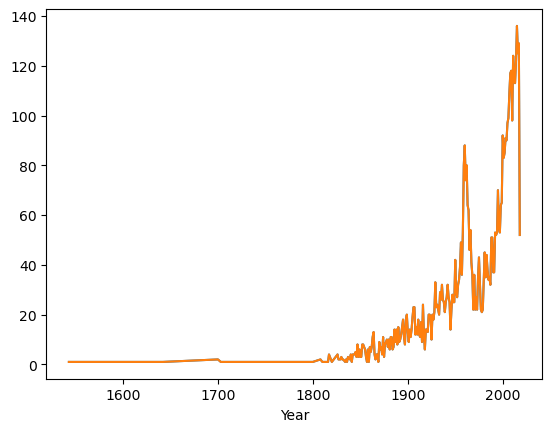

In [157]:

ataques_por_año.plot(kind='line')
# gráfico de línea para visualizar la frecuencia de ataques de tiburones a lo largo del tiempo

ataques_por_año.plot(kind='line')

# Como vemos puede ser que se hayan perdido bastantes datosdesde antes del 1800, por lo cual son muy lineales con respecto a los ultimos años en el 2000


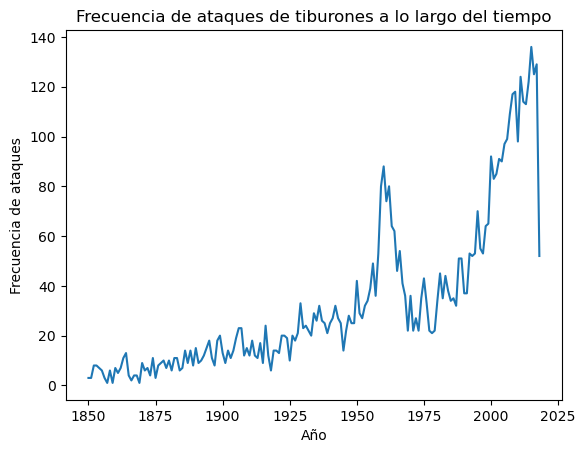

In [158]:
tiburon_filtrado = tiburon[tiburon['Year'] >= 1850]
ataques_por_año2 = tiburon_filtrado.groupby('Year').size().sort_index()
ataques_por_año2.plot(kind='line')

# Establecer etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Frecuencia de ataques')
plt.title('Frecuencia de ataques de tiburones a lo largo del tiempo')

# Mostrar el gráfico
plt.show()


# A partir del 1850 se ve el incremento de datos, procedemos a observar el cuadro, vemos dos grandes picos
# entre el año 1950 y 1975 y entre el 2000 y 20025.


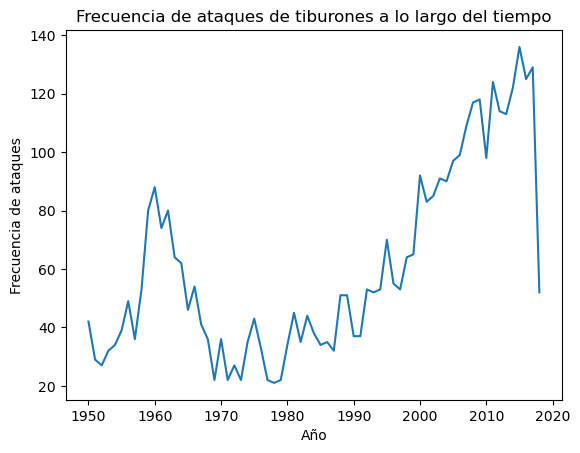

In [160]:
tiburon_filtrado3 = tiburon[tiburon['Year'] >= 1950]
ataques_por_año3 = tiburon_filtrado3.groupby('Year').size().sort_index()
ataques_por_año3.plot(kind='line')

# Establecer etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Frecuencia de ataques')
plt.title('Frecuencia de ataques de tiburones a lo largo del tiempo')

# Mostrar el gráfico
plt.show()

# En los años 60 se regitra un pico de ataques por encima de 80 ataques.

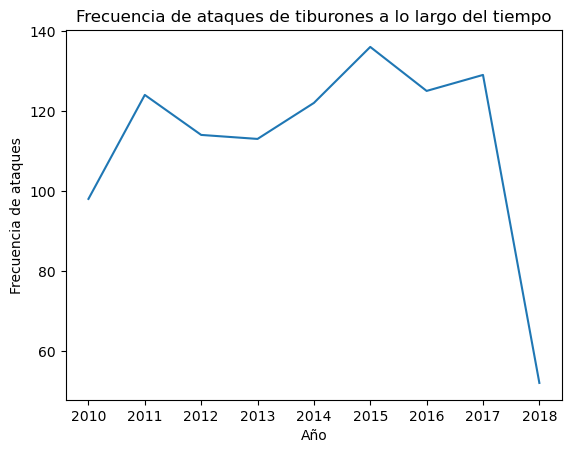

In [161]:
tiburon_filtrado4 = tiburon[tiburon['Year'] >= 2010]
ataques_por_año4 = tiburon_filtrado4.groupby('Year').size().sort_index()
ataques_por_año4.plot(kind='line')

# Establecer etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Frecuencia de ataques')
plt.title('Frecuencia de ataques de tiburones a lo largo del tiempo')

# Mostrar el gráfico
plt.show()

# El pico mas alto se registra en el año 2015 con un total de 136 ataques.

In [166]:
top_3_años = ataques_por_año.nlargest(3)

top_3_años

Year
2015    136
2017    129
2016    125
dtype: int64

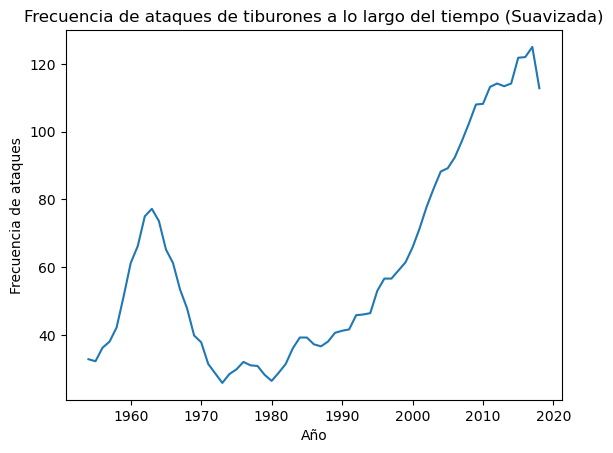

In [170]:
# Aplicar media móvil sobre los datos
ataques_por_año_suavizado = ataques_por_año3.rolling(window=5).mean()

# Graficar la frecuencia de ataques suavizada utilizando un gráfico de línea
ataques_por_año_suavizado.plot(kind='line')

# Establecer etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Frecuencia de ataques')
plt.title('Frecuencia de ataques de tiburones a lo largo del tiempo (Suavizada)')

# Mostrar el gráfico
plt.show()

In [172]:
ataques_por_pais = tiburon.groupby('Country').size().sort_values(ascending=False)
ataques_por_pais.head(10)

Country
USA                 2089
AUSTRALIA           1211
SOUTH AFRICA         532
NEW ZEALAND          119
PAPUA NEW GUINEA     110
BAHAMAS              104
BRAZIL               101
MEXICO                83
ITALY                 62
REUNION               56
dtype: int64

In [176]:
top_paises = ataques_por_pais.head(10)
top_paises
# Metemos en el top 10 de los paises con mas registros en ataques por tiburon

Country
USA                 2089
AUSTRALIA           1211
SOUTH AFRICA         532
NEW ZEALAND          119
PAPUA NEW GUINEA     110
BAHAMAS              104
BRAZIL               101
MEXICO                83
ITALY                 62
REUNION               56
dtype: int64

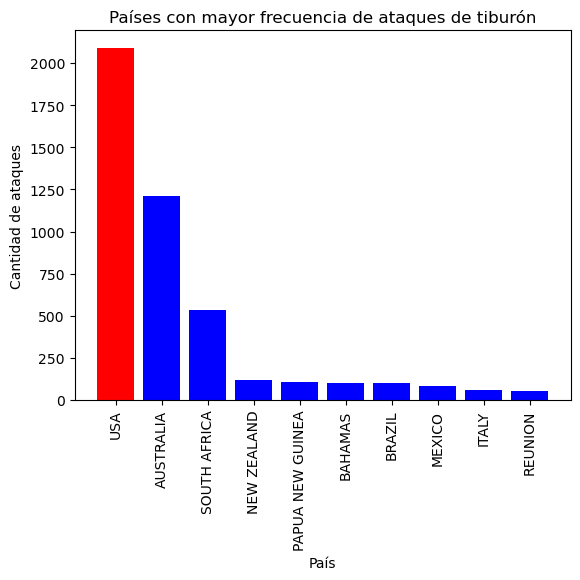

In [178]:
plt.bar(top_paises.index, top_paises.values, color='blue') 
# grafica con barras con .bar 
# top_paises.index países en el eje x
# top_paises.values frecuencias de ataques en el eje 

plt.bar(top_paises.index[0], top_paises[0], color='red')
# desde top paises index 0, el primero en top 1, color rojo

plt.xlabel('País') # Barras por paises.
plt.ylabel('Cantidad de ataques') # leyenda numero de ataques 
plt.title('Países con mayor frecuencia de ataques de tiburón') # titulo del grafico. 
plt.xticks(rotation=90)
plt.show()

# Observamos que Estados unidos es el pais con mas registros en ataques de tiburon

In [93]:
tiburon.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-06-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,NaN,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN,NaN
1,2018.06.18,18-06-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN,NaN
2,2018.06.09,09-06-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN,NaN
3,2018.06.08,08-06-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN,NaN
4,2018.06.04,04-06-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN,NaN


Definimos el siguiente objetivo:

Identificar los patrones y tendencias en los ataques de tiburones a lo largo del tiempo y en diferentes países.

¿Ha habido un aumento o disminución en los ataques de tiburones a lo largo de los años?

¿Cuáles son los países con mayor incidencia de ataques de tiburones?

¿Cuál es el tipo de ataque más común (provocado o no provocado)?

¿Existe alguna relación entre las actividades humanas y los ataques de tiburones? ¿Cuáles son las actividades más riesgosas?